## 1. Framing the Problem

The focus of this projects is on the productionizing/operation of Machine Learning. 

A quick and simple process of ML is developed in this notebook - from getting the data to creating the model. 

The dataset chosen for this project is from the US National Institute of Diabetes and Digestive and Kidney Diseases. The dataset presents diagnostic measurements from female patients of at least 21 years old of Pima heritage as variables and indicates if the patient has or has not diabetes as an outcome.

More information of the dataset can be found [here](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).

## Preparing the Toolbox

In [1]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, ConfusionMatrixDisplay
from joblib import dump

%matplotlib inline

## 2. Getting the data

In [8]:
project_directory = Path.cwd().parent
raw_data_directory = project_directory / "data" / "raw"
csv_filename = "diabetes.csv"
models_directory = project_directory / "models"

df = pd.read_csv(filepath_or_buffer=raw_data_directory / csv_filename)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 3. Creating and Saving the Model

In [3]:
X_train, X_test, y_train, y_test = train_test_split( 
    df.drop(labels="Outcome", axis=1), 
    df["Outcome"],
    random_state=42
)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

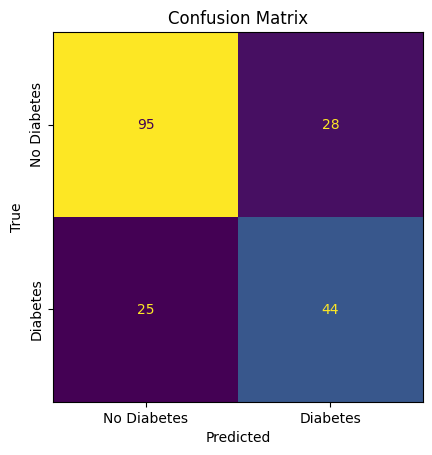

In [4]:
confusion_matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False)
confusion_matrix.ax_.set(
    title="Confusion Matrix", 
    xlabel="Predicted",
    xticklabels=("No Diabetes", "Diabetes"),
    ylabel="True",
)
confusion_matrix.ax_.set_yticklabels(labels=("No Diabetes", "Diabetes"), rotation=90, va="center")
plt.show()

In [5]:
print(
    ("="*3)+"Metrics:"+("="*3),
    f"Accuracy: {accuracy_score(y_test, y_pred):.2f}",
    f"ROC-AUC: {roc_auc_score(y_test, y_pred):.2f}",
    sep="\n"
)

===Metrics:===
Accuracy: 0.72
ROC-AUC: 0.71


In [7]:
dump(model, models_directory / "model.joblib")


['/Users/ewerthon/Documents/Materiais/[Curso] Data Science Degree/Módulo 16/mlops-diabetes/models/model.joblib']